# Held-out log-likelihood

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## compare SB-LDA and LDA 1/K

In [33]:
def compare_sbVSlda(K, D, inroot, heldoutroot, expset):
    """
    Inputs:
        K: approximation level
        D: mini-batch size 
        expset: list of experimental seeds
    Outputs:
        plots LL of LDA 1/K and SB_LDA versus number of minibatches
    Remarks: 
        all experiments are expected to run until completion i.e. 
        the same number of iterations.
    """
    
    # Load and compute average LDA 1/K
    ldadir = "ldaK" + str(K) + "_" + "D" + str(D) + "_" + inroot + "_" + heldoutroot
    ldaLL = []
    ## load experiments
    for seed in expset:
        ldapath = ldadir + "/LL_" + str(seed) + ".csv"
        result = np.loadtxt(ldapath)
        ldabatchcounts = result[:,0]
        ldaLL.append(result[:,2])
    ldaLL = np.array(ldaLL) # shape len(expset) x maxbatchcount
    ldaavg = np.mean(ldaLL, axis=0) # shape (maxbatchcount,)
    ldaerr = np.std(ldaLL, axis=0) # shape (maxbatchcount,)
    
    # Load and compute average SB_LDA
    sbdir = "sbldaK" + str(K) + "_" + "D" + str(D) + "_" + inroot + "_" + heldoutroot
    sbLL = []
    ## load experiments
    for seed in expset:
        sbpath = sbdir + "/LL_" + str(seed) + ".csv"
        result = np.loadtxt(sbpath)
        sbbatchcounts = result[:,0]
        sbLL.append(result[:,2])
    sbLL = np.array(sbLL) # shape len(expset) x len(batchcounts)
    sbavg = np.mean(sbLL, axis=0) # shape (len(batchcounts),)
    sberr = np.std(sbLL, axis=0) # shape (len(batchcounts),)
    
    fig = plt.figure()
    plt.errorbar(ldabatchcounts, ldaavg, yerr=ldaerr,label='LDA 1/K')
    plt.errorbar(sbbatchcounts, sbavg, yerr=sberr,label='SB-LDA')
    plt.title('K = %d, D = %d' %(K,D))
    plt.xlabel('Number of mini-batches')
    plt.ylabel('Held-out log-likelihood')
    plt.legend()
    plt.show()
    
    return 


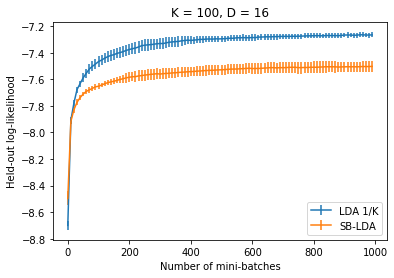

In [40]:
compare_sbVSlda(100, 16, "wiki10k","wiki1k", range(5,10))

## compare among SB-LDA for fixed D but varying K

In [5]:
def sb_acrossK(Klist, D, inroot, heldoutroot, expset, ax):
    """
    Inputs:
        Klist: approximation levels
        D: mini-batch size 
        inroot:
        heldoutroot:
        expset: dictionary of experimental seeds, keys being approximation levels in Klist 
        ax: axis to plot
    Outputs:
        plots LL of SB_LDA versus number of minibatches for different K's
    """
    
    sbavg = []
    sberr = []
    
    for i in range(len(Klist)):
        K = Klist[i]
        seeds = expset[K]
        sbdir = "sbldaK" + str(K) + "_" + "D" + str(D) + "_" + inroot + "_" + heldoutroot
        sbLL = []
        for seed in seeds:
            sbpath = sbdir + "/LL_" + str(seed) + ".csv"
            result = np.loadtxt(sbpath)
            sbbatchcounts = result[:,0]
            sbLL.append(result[:,2])
        sbLL = np.array(sbLL) # shape len(expset) x len(batchcounts)
        sbavg.append(np.mean(sbLL, axis=0)) # shape (len(batchcounts),)
        sberr.append(np.std(sbLL, axis=0)) # shape (len(batchcounts),)
    
    fig = plt.figure()
    for i in range(len(Klist)):
        plt.errorbar(sbbatchcounts, sbavg[i], yerr=sberr[i],label='K = %d' %Klist[i])
    ax.set_title('SB-LDA, D = %d' %D)
    ax.set_xlabel('Number of mini-batches')
    ax.set_ylabel('Held-out log-likelihood')

    return

ValueError: operands could not be broadcast together with shapes (15,) (10,) 

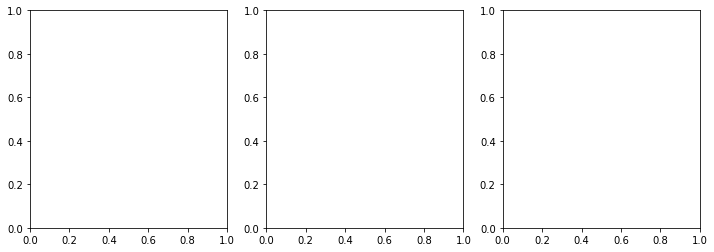

In [9]:
Klist = [50, 100, 150]
inroot = "wiki10k"
heldoutroot = "wiki1k"
expset = {50:[0,1,2,3,4], 100:[0,1,2,3,4], 150:[0,1,2,3,4]}

fig, axes = plt.subplots(1,3,figsize=(12,4))

D = [16, 50, 100]
for i in range(3):
    sb_acrossK(Klist, D[i], inroot, heldoutroot, expset, axes[i])
plt.show()

## compare among SB-LDA for fixed K but varying D

In [18]:
def sb_acrossD(K, Dlist, inroot, heldoutroot, expset, ax):
    """
    Inputs:
        K: approximation level
        Dlist: mini-batch sizes
        inroot:
        heldoutroot:
        expset: dictionary of experimental seeds, keys being minibatch sizes in Dlist
        ax: axis to plot
    Outputs:
        plots LL of SB_LDA versus number of minibatches for different K's
    """
    
    sbexs = [] # number of training examples processed
    sbavg = []
    sberr = []
    
    for i in range(len(Dlist)):
        D = Dlist[i]
        seeds = expset[K]
        sbdir = "sbldaK" + str(K) + "_" + "D" + str(D) + "_" + inroot + "_" + heldoutroot
        sbLL = []
        for seed in seeds:
            sbpath = sbdir + "/LL_" + str(seed) + ".csv"
            result = np.loadtxt(sbpath)
            sbbatchcounts = result[:,0]
            sbLL.append(result[:,2])
        sbbatchcounts = np.array(sbbatchcounts)
        sbexs.append(D*sbbatchcounts)
        sbLL = np.array(sbLL) # shape len(expset) x len(batchcounts)
        sbavg.append(np.mean(sbLL, axis=0)) # shape (len(batchcounts),)
        sberr.append(np.std(sbLL, axis=0)) # shape (len(batchcounts),)
    
    for i in range(len(Dlist)):
        plt.errorbar(sbexs[i], sbavg[i], yerr=sberr[i],label='D = %d' %Dlist[i])
    ax.set_title('SB-LDA, K = %d' %K)
    ax.set_xlabel('Number of training examples processed')
    ax.set_ylabel('Held-out log-likelihood')
    ax.legend()
    return

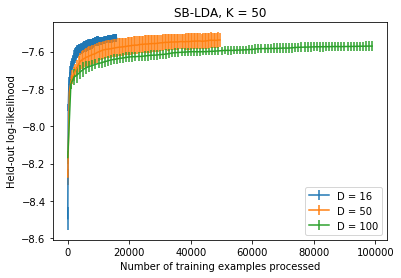

In [19]:
K = 50
Dlist = [16, 50, 100]
inroot = "wiki10k"
heldoutroot = "wiki1k"
expset = {16:[0,1,2,3,4], 50:[0,1,2,3,4], 100:[0,1,2,3,4]}

sb_acrossD(K, Dlist, inroot, heldoutroot, expset, plt.gca())
plt.show()

# Inferred topics

In [29]:
import numpy as np
import pandas as pd

In [69]:
def printtopics(vocabfile, lambdafile, normalized, threshold, displaycount):
    vocab = open(vocabfile).readlines()
    testlambda = np.loadtxt(lambdafile)
    sigtopics = 0
    df = pd.DataFrame() 
    for k in range(0, len(testlambda)):
        lambdak = list(testlambda[k, :])
        lambdak = [round(i,1) for i in lambdak]
        # report marginal probabilities instead of Dirichlet parameters
        if (normalized):
            lambdak = lambdak / sum(lambdak)
        temp = list(zip(lambdak, list(range(0, len(lambdak)))))
        temp = sorted(temp, key = lambda x: x[0], reverse=True)
        # plot topics with parameters exceeding the threshold
        if (temp[0][0] >= threshold):
            colname = 'topic %d' % (k)
            coldata = [(str.strip(vocab[temp[i][1]]), temp[i][0]) for i in range(0, displaycount)]
            df[colname] = coldata
    print("Discovered %d significant topics at threshold %.2f" %(len(df.columns),threshold))
    return df

In [63]:
vocabfile = "dictnostops.txt"
lambdafile = "ldaK100_D16_wiki10k_wiki1k/lambda-100.dat"
normalized = 0
threshold = 200
displaycount = 10

In [75]:
df = printtopics(vocabfile, "ldaK100_D16_wiki10k_wiki1k/lambda-100.dat", 0, 199, 10)
df

Discovered 13 significant topics at threshold 199.00


,topic 11,topic 12,topic 21,topic 40,topic 44,topic 56,topic 62,topic 72,topic 77,topic 85,topic 87,topic 88,topic 90
0,"(der, 620.1)","(first, 5566.2)","(squadron, 386.6)","(music, 1352.9)","(line, 2150.1)","(score, 6142.9)","(ship, 1025.0)","(town, 1779.7)","(people, 870.2)","(party, 1981.5)","(goals, 1476.7)","(january, 783.3)","(species, 1017.5)"
1,"(book, 561.5)","(new, 4391.5)","(navy, 157.1)","(band, 1292.5)","(series, 1428.6)","(team, 4204.9)","(ships, 476.4)","(max, 944.5)","(group, 813.6)","(division, 870.6)","(clubs, 694.1)","(november, 531.5)","(family, 486.5)"
2,"(van, 497.2)","(two, 3563.2)","(royal, 149.6)","(song, 1134.7)","(new, 1401.1)","(seed, 1006.6)","(service, 137.4)","(population, 857.5)","(city, 783.9)","(election, 839.1)","(years, 558.9)","(king, 500.3)","(island, 445.3)"
3,"(die, 410.0)","(county, 3229.9)","(knight, 97.2)","(released, 517.2)","(company, 1229.7)","(round, 531.9)","(vessel, 134.3)","(district, 607.5)","(new, 760.7)","(brigade, 755.9)","(data, 395.9)","(san, 444.6)","(black, 439.8)"
4,"(life, 395.5)","(school, 3225.4)","(prussian, 95.6)","(rock, 471.0)","(world, 1218.8)","(final, 348.5)","(fleet, 119.0)","(village, 533.0)","(history, 741.8)","(act, 713.5)","(report, 342.5)","(october, 384.7)","(forests, 422.1)"
5,"(published, 387.2)","(national, 2972.1)","(commander, 32.4)","(songs, 398.3)","(road, 1009.1)","(attendance, 331.3)","(class, 98.1)","(area, 332.1)","(air, 728.2)","(political, 662.7)","(sort, 292.6)","(died, 328.2)","(sea, 387.2)"
6,"(stories, 379.8)","(years, 2954.1)","(naval, 26.3)","(single, 323.6)","(street, 975.5)","(indiana, 243.6)","(vessels, 96.5)","(parish, 215.6)","(literature, 721.1)","(battle, 639.8)","(attendance, 254.0)","(louise, 305.8)","(found, 387.0)"
7,"(und, 318.8)","(year, 2904.6)","(col, 25.2)","(turkish, 308.9)","(station, 926.5)","(bills, 125.1)","(naval, 74.5)","(age, 199.3)","(work, 661.6)","(minister, 592.4)","(cup, 222.5)","(bishop, 248.7)","(forest, 364.5)"
8,"(written, 316.7)","(state, 2733.0)","(dominion, 22.9)","(live, 285.7)","(built, 764.5)","(report, 89.4)","(oil, 72.4)","(elevation, 197.6)","(program, 528.7)","(lord, 585.9)","(club, 218.3)","(august, 236.3)","(genus, 350.1)"
9,"(play, 294.8)","(march, 2666.0)","(command, 22.3)","(die, 276.9)","(two, 709.6)","(lions, 87.7)","(sea, 66.0)","(province, 195.0)","(chinese, 517.6)","(valley, 502.4)","(loan, 206.2)","(brother, 223.2)","(tropical, 315.9)"


In [76]:
df = printtopics(vocabfile, "sbldaK100_D16_wiki10k_wiki1k/lambda-100.dat", 0, 199, 10)
df

Discovered 5 significant topics at threshold 199.00


,topic 0,topic 1,topic 2,topic 3,topic 4
0,"(week, 4438.8)","(series, 1913.8)","(nature, 940.2)","(score, 11240.1)","(battle, 199.3)"
1,"(first, 4408.1)","(best, 1851.3)","(church, 692.5)","(team, 6785.5)","(ships, 181.0)"
2,"(new, 3809.6)","(music, 1823.9)","(century, 593.7)","(seed, 3170.3)","(lord, 167.0)"
3,"(years, 3206.1)","(new, 1551.1)","(work, 480.3)","(round, 952.4)","(squadron, 160.9)"
4,"(two, 3148.3)","(sort, 1348.1)","(cells, 453.5)","(report, 787.7)","(attack, 154.1)"
5,"(color, 2969.3)","(released, 1284.7)","(people, 441.3)","(attendance, 617.3)","(control, 154.0)"
6,"(time, 2860.5)","(first, 1159.6)","(attitude, 406.6)","(goals, 300.1)","(command, 151.7)"
7,"(state, 2491.6)","(song, 1090.4)","(roman, 392.9)","(van, 178.4)","(commander, 145.5)"
8,"(city, 2425.3)","(cat, 939.8)","(published, 380.4)","(section, 143.9)","(army, 144.7)"
9,"(united, 2423.9)","(love, 871.7)","(found, 376.0)","(second, 134.0)","(civil, 141.2)"
